<a href="https://colab.research.google.com/github/JMFU/QuantEcon.py/blob/master/graficas2r2pq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving produccion-nacional-de-petroleo-y-gas-may2021.xlsx to produccion-nacional-de-petroleo-y-gas-may2021 (2).xlsx


In [2]:
df = pd.read_excel('produccion-nacional-de-petroleo-y-gas-may2021.xlsx', 
                                           sheet_name='Gas natural',
                                           skiprows=6,
                   names=['Fecha', 'Cuenca', 'Ubicación', 'Campo', 
                          'Operador', 'MMpcd', 'Nitrogeno'])
print(df.head())

       Fecha               Cuenca  ...     MMpcd Nitrogeno
0 1960-01-01     Tampico-Misantla  ...  1.230383       NaN
1 1960-01-01  Cuencas del Sureste  ...  2.060930       NaN
2 1960-01-01     Tampico-Misantla  ...  0.097871       NaN
3 1960-01-01             Veracruz  ...  0.466636       NaN
4 1960-01-01  Cuencas del Sureste  ...  0.765272       NaN

[5 rows x 7 columns]


In [3]:
df.columns

Index(['Fecha', 'Cuenca', 'Ubicación', 'Campo', 'Operador', 'MMpcd',
       'Nitrogeno'],
      dtype='object')

In [4]:
produc_por_cuenca = df.groupby(['Fecha', 'Cuenca'])['MMpcd'].sum()
produc_por_cuenca

Fecha       Cuenca             
1960-01-01  Burgos                  308.354961
            Cuencas del Sureste     333.598065
            Tampico-Misantla        242.573640
            Veracruz                  1.160064
1960-02-01  Burgos                  322.044792
                                      ...     
2021-05-01  Burgos                  509.531495
            Cuencas del Sureste    2907.414405
            Sabinas                   4.659370
            Tampico-Misantla        109.298637
            Veracruz                311.691405
Name: MMpcd, Length: 4163, dtype: float64

In [5]:
produc_por_cuenca = produc_por_cuenca.reset_index(level=['Fecha','Cuenca'])

In [12]:
produc_por_cuenca = produc_por_cuenca.pivot(index='Fecha', columns='Cuenca', values='MMpcd')

In [13]:
produc_por_cuenca

Cuenca,Burgos,Cinturón Plegado de Chiapas,Cuencas del Sureste,Plataforma Burro-Picachos,Plataforma de Yucatán,Sabinas,Tampico-Misantla,Veracruz
Fecha,,,,,,,,
1960-01-01,308.354961,NaN,333.598065,NaN,NaN,NaN,242.573640,1.160064
1960-02-01,322.044792,NaN,340.106612,NaN,NaN,NaN,235.654219,0.441103
1960-03-01,325.609422,NaN,335.819021,NaN,NaN,NaN,238.745411,0.431006
1960-04-01,321.720880,NaN,336.851262,NaN,0.035689,NaN,227.598569,0.417057
1960-05-01,330.076676,NaN,319.975141,NaN,0.091614,NaN,238.880339,0.372383
...,...,...,...,...,...,...,...,...
2021-01-01,522.782320,0.844934,2807.880621,NaN,NaN,5.217876,116.066691,318.139780
2021-02-01,521.676538,0.155655,2831.759167,NaN,NaN,5.222477,112.407230,330.806145
2021-03-01,535.631958,NaN,2869.147701,NaN,NaN,5.110917,111.758106,322.616773


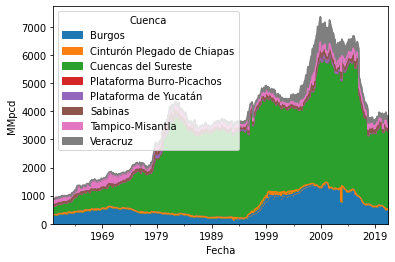

<Figure size 432x288 with 0 Axes>

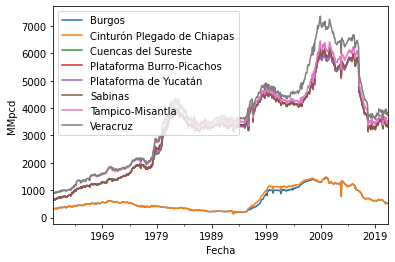

In [17]:
import matplotlib.pyplot as plt

produc_por_cuenca.plot.area()
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
plt.show()

plt.figure()
produc_por_cuenca[['Burgos', 'Cinturón Plegado de Chiapas', 'Cuencas del Sureste','Plataforma Burro-Picachos', 'Plataforma de Yucatán', 'Sabinas','Tampico-Misantla', 'Veracruz']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
plt.legend()
plt.show()